In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import GridSearchCV

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
amostra_treino = np.random.choice(range(len(x_train)), size=30000, replace=False)
amostra_teste = np.random.choice(range(len(x_test)), size=3000, replace=False)

x_train = x_train[amostra_treino,:]
y_train = y_train[amostra_treino,:]

x_test = x_test[amostra_teste,:]
y_test = y_test[amostra_teste,:]

In [ ]:
amostra_treino

array([27358,  2734, 24384, ...,  1171, 15789,   822])

In [ ]:
def esqueci_as_classes_me_ajuda(pred):
    dicionario = {0: "airplane",
           1: "automobile",
           2: "bird",
           3: "cat",
           4: "deer",
           5: "dog",
           6: "frog",
           7: "horse",
           8: "ship",
           9: "truck"}
    return dicionario[np.argmax(pred)]

Analisando a distribuição dos dados de Treino e Test, pois a cross-validation

(array([2977., 3032., 3004., 2997., 2985., 2992., 3007., 2993., 3013.,
        3000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

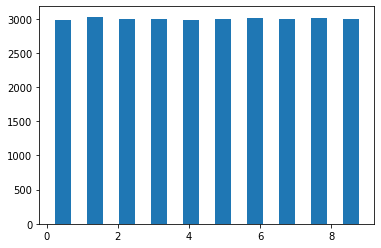

In [ ]:
plt.hist(y_train, rwidth = 0.5)

(array([291., 307., 323., 314., 290., 303., 288., 271., 286., 327.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

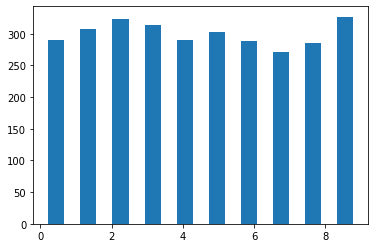

In [ ]:
plt.hist(y_test, rwidth = 0.5)

In [ ]:
# one hot encoding nos y
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Pegando um dado aleatorio do conjunto de dados

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
airplane


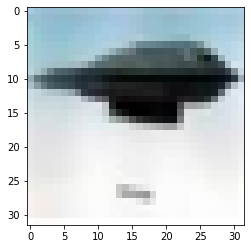

In [ ]:
i = np.random.randint(low=0, high=3000)
y_test[i]
plt.imshow(x_test[i])
print(y_test[i])
print(esqueci_as_classes_me_ajuda(y_test[i]))

In [ ]:
from keras.applications import vgg16

# VGG16 was designed to work on 224 x 224 pixel input images sizes (base é a imagenet)
# Aqui vamos usar para as imagens 32 x 32 do CIFAR10

# Loads the VGG16 model without the top or FC layers
vgg16_model = vgg16.VGG16(weights='imagenet', include_top = False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 1s 0us/step


Copiando a estrutura da rede neural da vgg16

In [ ]:
model = keras.Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [ ]:
# Congelando os pesos que não vou treinar
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [ ]:
model.add(layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Adicionei o batch normalization, com o intuito de deixar o treinamento mais rapido e deixar o grafico da loss mais estavel.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

In [ ]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>

Criando um stopper que se nao tiver alteração em 10 epocas, entao o callstopper sera disparado e parará o treinamento

In [ ]:
# callbacks: early stopping
stopper = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, verbose=2
)

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_lea0000000000000000000000000000000000000000000000rning_rate=1e-2,
    decay_steps = 10000,0 
    decay_rate = 0.9) 

In [ ]:
# compile model
opt = keras.optimizers.SGD(learning_rate=lr_schedule)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Salvando os pesos antes de treinar.
#model.save_weights('pesos_iniciais')

In [ ]:
# pré-processamento das imagens assim como pede na documentação da VGG
input_test = tf.keras.applications.vgg16.preprocess_input(x_test)
input_train = tf.keras.applications.vgg16.preprocess_input(x_train)

In [ ]:
#model.load_weights('pesos_iniciais')

In [ ]:
model.fit(input_train,
           y_train,
           epochs=100,
           batch_size=128,
           validation_data=(input_test, y_test)
           , callbacks=[stopper])

Epoch 1/100
235/235 [==============================] - 5s 21ms/step - loss: 1.9489 - accuracy: 0.3223 - val_loss: 1.6251 - val_accuracy: 0.4363
Epoch 2/100
235/235 [==============================] - 5s 20ms/step - loss: 1.4771 - accuracy: 0.4942 - val_loss: 1.4148 - val_accuracy: 0.5100
Epoch 3/100
235/235 [==============================] - 5s 20ms/step - loss: 1.3260 - accuracy: 0.5414 - val_loss: 1.3187 - val_accuracy: 0.5450
Epoch 4/100
235/235 [==============================] - 5s 20ms/step - loss: 1.2444 - accuracy: 0.5724 - val_loss: 1.2608 - val_accuracy: 0.5617
Epoch 5/100
235/235 [==============================] - 5s 22ms/step - loss: 1.1863 - accuracy: 0.5876 - val_loss: 1.2228 - val_accuracy: 0.5740
Epoch 6/100
235/235 [==============================] - 5s 19ms/step - loss: 1.1416 - accuracy: 0.6039 - val_loss: 1.1930 - val_accuracy: 0.5793
Epoch 7/100
235/235 [==============================] - 4s 19ms/step - loss: 1.1158 - accuracy: 0.6105 - val_loss: 1.1694 - val_accuracy:

Adicionei um Early stopper para monitorar o val_loss e para ser disparado depois de 10 epocas sem grandes mudanças. O resultado foi que não teve grandes mudanças na val_loss da epoca 45 a 55, ficando em 1.04. 

In [ ]:
boundaries = [1000, 1100]
values = [1e-2, 1e-1, 1e-2]

lr_schedule_pwcd = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values, name=None
)

# compile model
opt = keras.optimizers.SGD(learning_rate=lr_schedule_pwcd)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.load_weights('pesos_iniciais')

In [ ]:
model.fit(input_train,
           y_train,
           epochs=100,
           batch_size=128,
           validation_data=(input_test, y_test)
           , callbacks=[stopper])

Epoch 1/100
235/235 [==============================] - 7s 23ms/step - loss: 1.9488 - accuracy: 0.3253 - val_loss: 1.6262 - val_accuracy: 0.4350
Epoch 2/100
235/235 [==============================] - 5s 21ms/step - loss: 1.4763 - accuracy: 0.4979 - val_loss: 1.4158 - val_accuracy: 0.5130
Epoch 3/100
235/235 [==============================] - 5s 20ms/step - loss: 1.3244 - accuracy: 0.5479 - val_loss: 1.3180 - val_accuracy: 0.5460
Epoch 4/100
235/235 [==============================] - 5s 20ms/step - loss: 1.2421 - accuracy: 0.5720 - val_loss: 1.2594 - val_accuracy: 0.5647
Epoch 5/100
235/235 [==============================] - 5s 23ms/step - loss: 1.1469 - accuracy: 0.6000 - val_loss: 1.1468 - val_accuracy: 0.5973
Epoch 6/100
235/235 [==============================] - 5s 23ms/step - loss: 1.0559 - accuracy: 0.6338 - val_loss: 1.1311 - val_accuracy: 0.6007
Epoch 7/100
235/235 [==============================] - 5s 23ms/step - loss: 1.0392 - accuracy: 0.6375 - val_loss: 1.1201 - val_accuracy:

Early stopper parou na epoca 48, diferente do outro algoritmo de decaimento de learning rate.

Resultados: 

1- O PiecewiseConstantDecay foi um pouquinho de nada mais lento que o ExponentialDecay no tempo de execução individual a cada epoca.
            
2- O PiecewiseConstantDecay convergiu mais rapido(epoca 48) do que o ExponentialDecay(epoca 55).

3- val_loss = 1.04 em ambos os algoritmos.

In [ ]:
initial_learning_rate = 1e-2
decay_steps = 100.0
decay_rate = 0.9
learning_rate_ITD = keras.optimizers.schedules.InverseTimeDecay(
  initial_learning_rate, decay_steps, decay_rate)


# compile model
opt = keras.optimizers.SGD(learning_rate=learning_rate_ITD)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.load_weights('pesos_iniciais')

In [ ]:
model.fit(input_train,
           y_train,
           epochs=100,
           batch_size=128,
           validation_data=(input_test, y_test)
           , callbacks=[stopper])

Epoch 1/100
235/235 [==============================] - 5s 20ms/step - loss: 2.0766 - accuracy: 0.2776 - val_loss: 1.8515 - val_accuracy: 0.3550
Epoch 2/100
235/235 [==============================] - 4s 19ms/step - loss: 1.7509 - accuracy: 0.3954 - val_loss: 1.7137 - val_accuracy: 0.4033
Epoch 3/100
235/235 [==============================] - 5s 20ms/step - loss: 1.6490 - accuracy: 0.4357 - val_loss: 1.6485 - val_accuracy: 0.4263
Epoch 4/100
235/235 [==============================] - 4s 19ms/step - loss: 1.5984 - accuracy: 0.4512 - val_loss: 1.6080 - val_accuracy: 0.4430
Epoch 5/100
235/235 [==============================] - 4s 19ms/step - loss: 1.5608 - accuracy: 0.4662 - val_loss: 1.5795 - val_accuracy: 0.4513
Epoch 6/100
235/235 [==============================] - 5s 20ms/step - loss: 1.5358 - accuracy: 0.4741 - val_loss: 1.5578 - val_accuracy: 0.4587
Epoch 7/100
235/235 [==============================] - 5s 20ms/step - loss: 1.5175 - accuracy: 0.4821 - val_loss: 1.5416 - val_accuracy:

Dessa vez o Early stopping nao foi disparado, ou seja, foi executado todas das epocas.

Resultados: 

1- O InverseTimeDecay foi o que mais demorou para convergir e em 100 epocas o maximo que ele chegou na val_loss foi 1.35. Foi o pior desempenho em relação aos outros para esse conjunto de dados. 

2-Tempo de execução individual a cada epoca foi parecido com a ExponencialDecay.

Conclusão: Para esse conjunto de dados, a o melhor algoritmo foi o PiecewiseConstantDecay. Manteve a menor val_loss = 1.04 e convergiu mais rapido.

In [ ]:
model2 = keras.Sequential()
for layer in vgg16_model.layers:
    model2.add(layer)

for layer in model2.layers:
    layer.trainable = False

model2.add(layers.Flatten())
model2.add(tf.keras.layers.BatchNormalization())
model2.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l=0.01)))
model2.add(layers.Dense(10, activation='softmax'))

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps = 10000,
    decay_rate = 0.9)

opt = keras.optimizers.SGD(learning_rate=lr_schedule)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(input_train,
           y_train,
           epochs=100,
           batch_size=128,
           validation_data=(input_test, y_test)
           , callbacks=[stopper])


Epoch 1/100
235/235 [==============================] - 7s 22ms/step - loss: 8.8188 - accuracy: 0.2963 - val_loss: 6.7996 - val_accuracy: 0.4510
Epoch 2/100
235/235 [==============================] - 5s 19ms/step - loss: 5.3664 - accuracy: 0.5085 - val_loss: 4.1632 - val_accuracy: 0.5333
Epoch 3/100
235/235 [==============================] - 6s 24ms/step - loss: 3.3038 - accuracy: 0.5575 - val_loss: 2.6697 - val_accuracy: 0.5543
Epoch 4/100
235/235 [==============================] - 5s 21ms/step - loss: 2.2862 - accuracy: 0.5675 - val_loss: 2.0542 - val_accuracy: 0.5590
Epoch 5/100
235/235 [==============================] - 6s 24ms/step - loss: 1.9064 - accuracy: 0.5672 - val_loss: 1.8326 - val_accuracy: 0.5550
Epoch 6/100
235/235 [==============================] - 5s 21ms/step - loss: 1.7611 - accuracy: 0.5629 - val_loss: 1.7376 - val_accuracy: 0.5483
Epoch 7/100
235/235 [==============================] - 5s 21ms/step - loss: 1.6879 - accuracy: 0.5679 - val_loss: 1.6841 - val_accuracy:

Usei o mesmo modelo que usei o ExponencialDecay, só que dessa vez regularizando com L1 a penultima camada da rede.

Resultado: 

1- O algoritmo ficou ligeiramente mais lento. 

2- val_loss convergiu para 1.38. Resultado muito pior que sem regularização. Lembrando que sem regularização val_loss = 1.04.

3- Com regularização o modelo parou na epoca 89, sem regularização parou na epoca 55.

In [ ]:
model3 = keras.Sequential()
for layer in vgg16_model.layers:
    model3.add(layer)

for layer in model3.layers:
    layer.trainable = False

model3.add(layers.Flatten())
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dropout(.5, input_shape=(2,)))
model3.add(layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l=0.01)))
model3.add(layers.Dense(10, activation='softmax'))

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps = 10000,
    decay_rate = 0.9)

opt = keras.optimizers.SGD(learning_rate=lr_schedule)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model3.fit(input_train,
           y_train,
           epochs=100,
           batch_size=128,
           validation_data=(input_test, y_test)
           , callbacks=[stopper])

Epoch 1/100
235/235 [==============================] - 7s 27ms/step - loss: 8.9227 - accuracy: 0.2500 - val_loss: 6.6682 - val_accuracy: 0.4413
Epoch 2/100
235/235 [==============================] - 5s 22ms/step - loss: 5.3356 - accuracy: 0.4301 - val_loss: 4.0611 - val_accuracy: 0.5237
Epoch 3/100
235/235 [==============================] - 5s 21ms/step - loss: 3.3003 - accuracy: 0.4943 - val_loss: 2.6443 - val_accuracy: 0.5450
Epoch 4/100
235/235 [==============================] - 5s 23ms/step - loss: 2.3468 - accuracy: 0.5087 - val_loss: 2.0943 - val_accuracy: 0.5440
Epoch 5/100
235/235 [==============================] - 5s 21ms/step - loss: 2.0209 - accuracy: 0.5079 - val_loss: 1.9102 - val_accuracy: 0.5437
Epoch 6/100
235/235 [==============================] - 5s 23ms/step - loss: 1.8988 - accuracy: 0.5113 - val_loss: 1.8235 - val_accuracy: 0.5477
Epoch 7/100
235/235 [==============================] - 5s 21ms/step - loss: 1.8403 - accuracy: 0.5100 - val_loss: 1.7745 - val_accuracy:

Como ultimo teste. Usei a rede anterior, com regularização, só que dessa vez adicionei um dropout de 0.5
ExponencialDecay com regularização e dropout(1) deve o pior desempenho de todas as redes. Comparado com a ExponencialDecay sem regularização e sem dropout(2): 

1- (1) val_loss = 1.51, (2) val_loss = 1.04. 

2- (1) epoca = 92, (2) epoca = 55, ou seja, o (1) demorou muito mais para convergir.

Conclusão: Melhor rede foi do algoritmo PiecewiseConstantDecay. Convergiu mais rapido e teve o menor val_loss.

Qualquer duvida, estou a disposição. Obrigado.